Used Car Price Prediction

1) Problem statement.

* This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
* If user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

2) Data Collection.
* The Dataset is collected from scrapping from cardheko webiste
* The data consists of 13 column and 15411 rows.

In [1]:
#Import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#import the dataset

df=pd.read_csv("C:/Users/Lenovo/Downloads/cardekho_imputated.csv",encoding='latin')
df.head(5)

,ID,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


Data description
The business meaning of each column in the data is as below

ID - Generalised ID
car_name - Name of the car
brand - Name of the brand
model - Name of the model of the car
vehicle_age - age of the vehicle in years
km_driven - Kilometers driven
seller_type - Type of seller
transmission_type - Type of transmission
mileage - mileage given
engine - 
max_power - 
seats- number of seats
selling_price-Price of the second hand car

In [3]:
print("Shape before removing duplicates:",df.shape )

Shape before removing duplicates: (15411, 14)


In [4]:
#Cleaning data
#Drop duplicates

df=df.drop_duplicates()
print("Shape after removing duplicates:",df.shape )

Shape after removing duplicates: (15411, 14)


In [5]:
#Data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.8+ MB


In [6]:
#Differentiate between continous and categorical variable
df.nunique()

ID                   15411
car_name               121
brand                   32
model                  120
vehicle_age             24
km_driven             3688
seller_type              3
fuel_type                5
transmission_type        2
mileage                411
engine                 110
max_power              342
seats                    8
selling_price         1086
dtype: int64

Categorical variable - brand,seller_type,fuel_type,transmission_type
Continous variable - vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price

Target variable - selling_price
Predictor variable-brand,seller_type,fuel_type,transmission_type,vehicle_age,km_driven,mileage,engine,max_power,seats

In [7]:
#drop useless columns
df.drop(columns=['ID','car_name','model','brand'],axis=1,inplace=True)
df.head(5)

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [8]:
#Checking for missing values
df.isnull().sum()

vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [9]:
df.isna().sum()


vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [10]:
#Summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vehicle_age,15411.0,NaN,NaN,NaN,6.036338,3.013291,0.0,4.0,6.0,8.0,29.0
km_driven,15411.0,NaN,NaN,NaN,55616.480631,51618.548422,100.0,30000.0,50000.0,70000.0,3800000.0
seller_type,15411,3,Dealer,9539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,15411,5,Petrol,7643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission_type,15411,2,Manual,12225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,15411.0,NaN,NaN,NaN,19.701151,4.171265,4.0,17.0,19.67,22.7,33.54
engine,15411.0,NaN,NaN,NaN,1486.057751,521.106696,793.0,1197.0,1248.0,1582.0,6592.0
max_power,15411.0,NaN,NaN,NaN,100.588254,42.972979,38.4,74.0,88.5,117.3,626.0
seats,15411.0,NaN,NaN,NaN,5.325482,0.807628,0.0,5.0,5.0,5.0,9.0
selling_price,15411.0,NaN,NaN,NaN,774971.11641,894128.363263,40000.0,385000.0,556000.0,825000.0,39500000.0


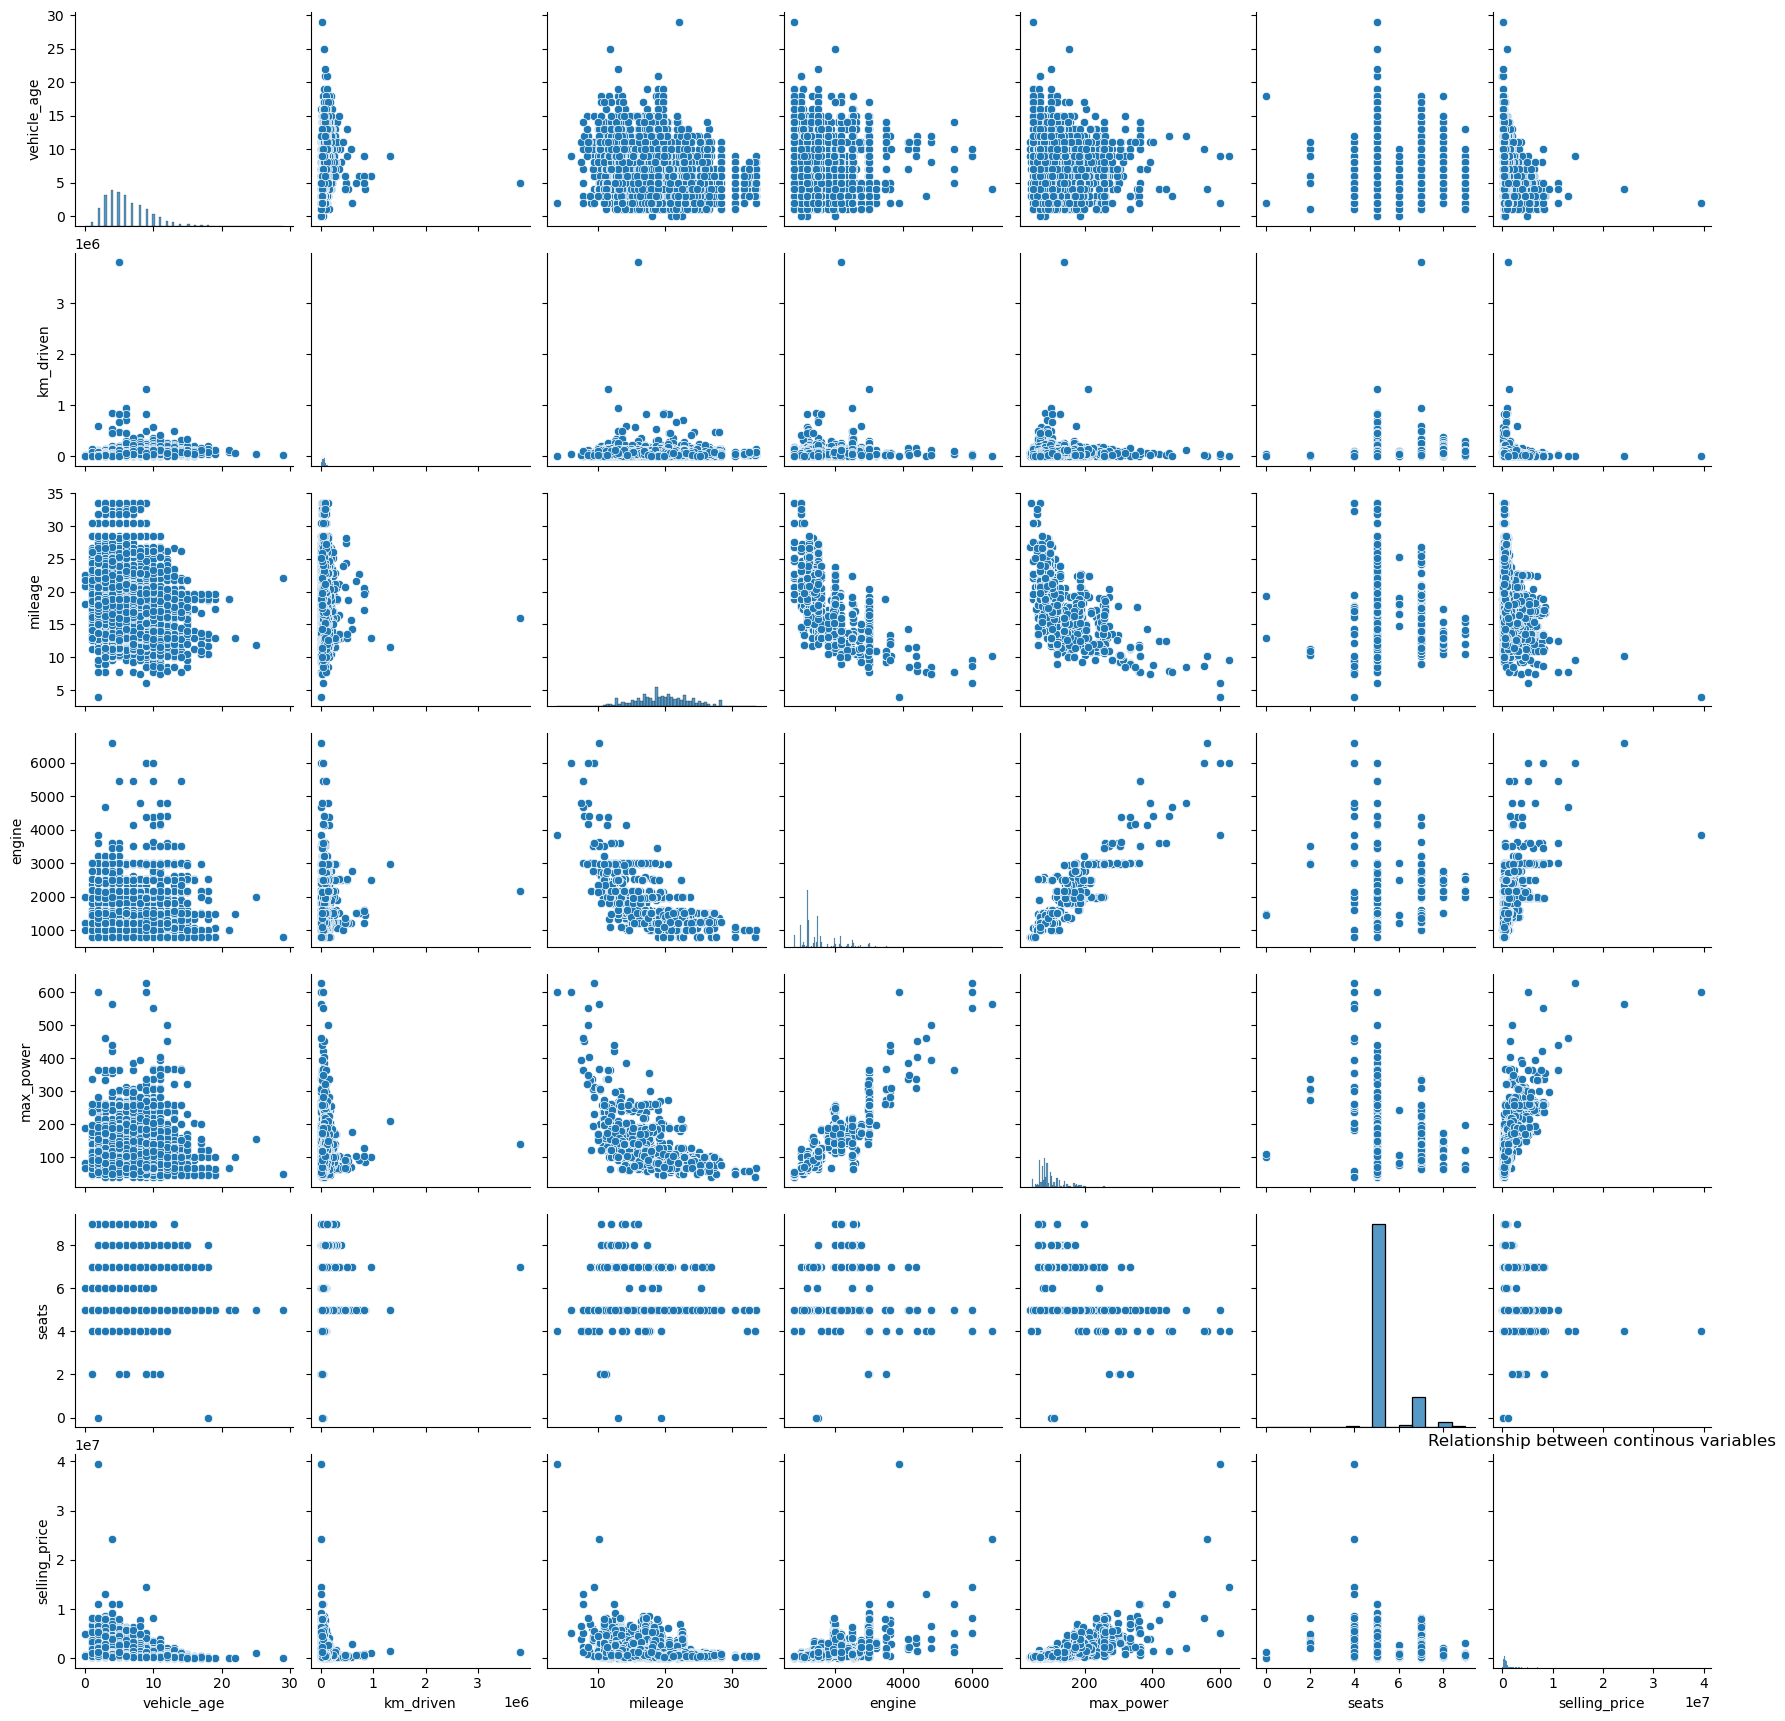

In [11]:
#Visualization
sns.pairplot(df,vars=['vehicle_age','km_driven','mileage','engine','max_power','seats','selling_price'])
plt.title('Relationship between continous variables')
plt.show()

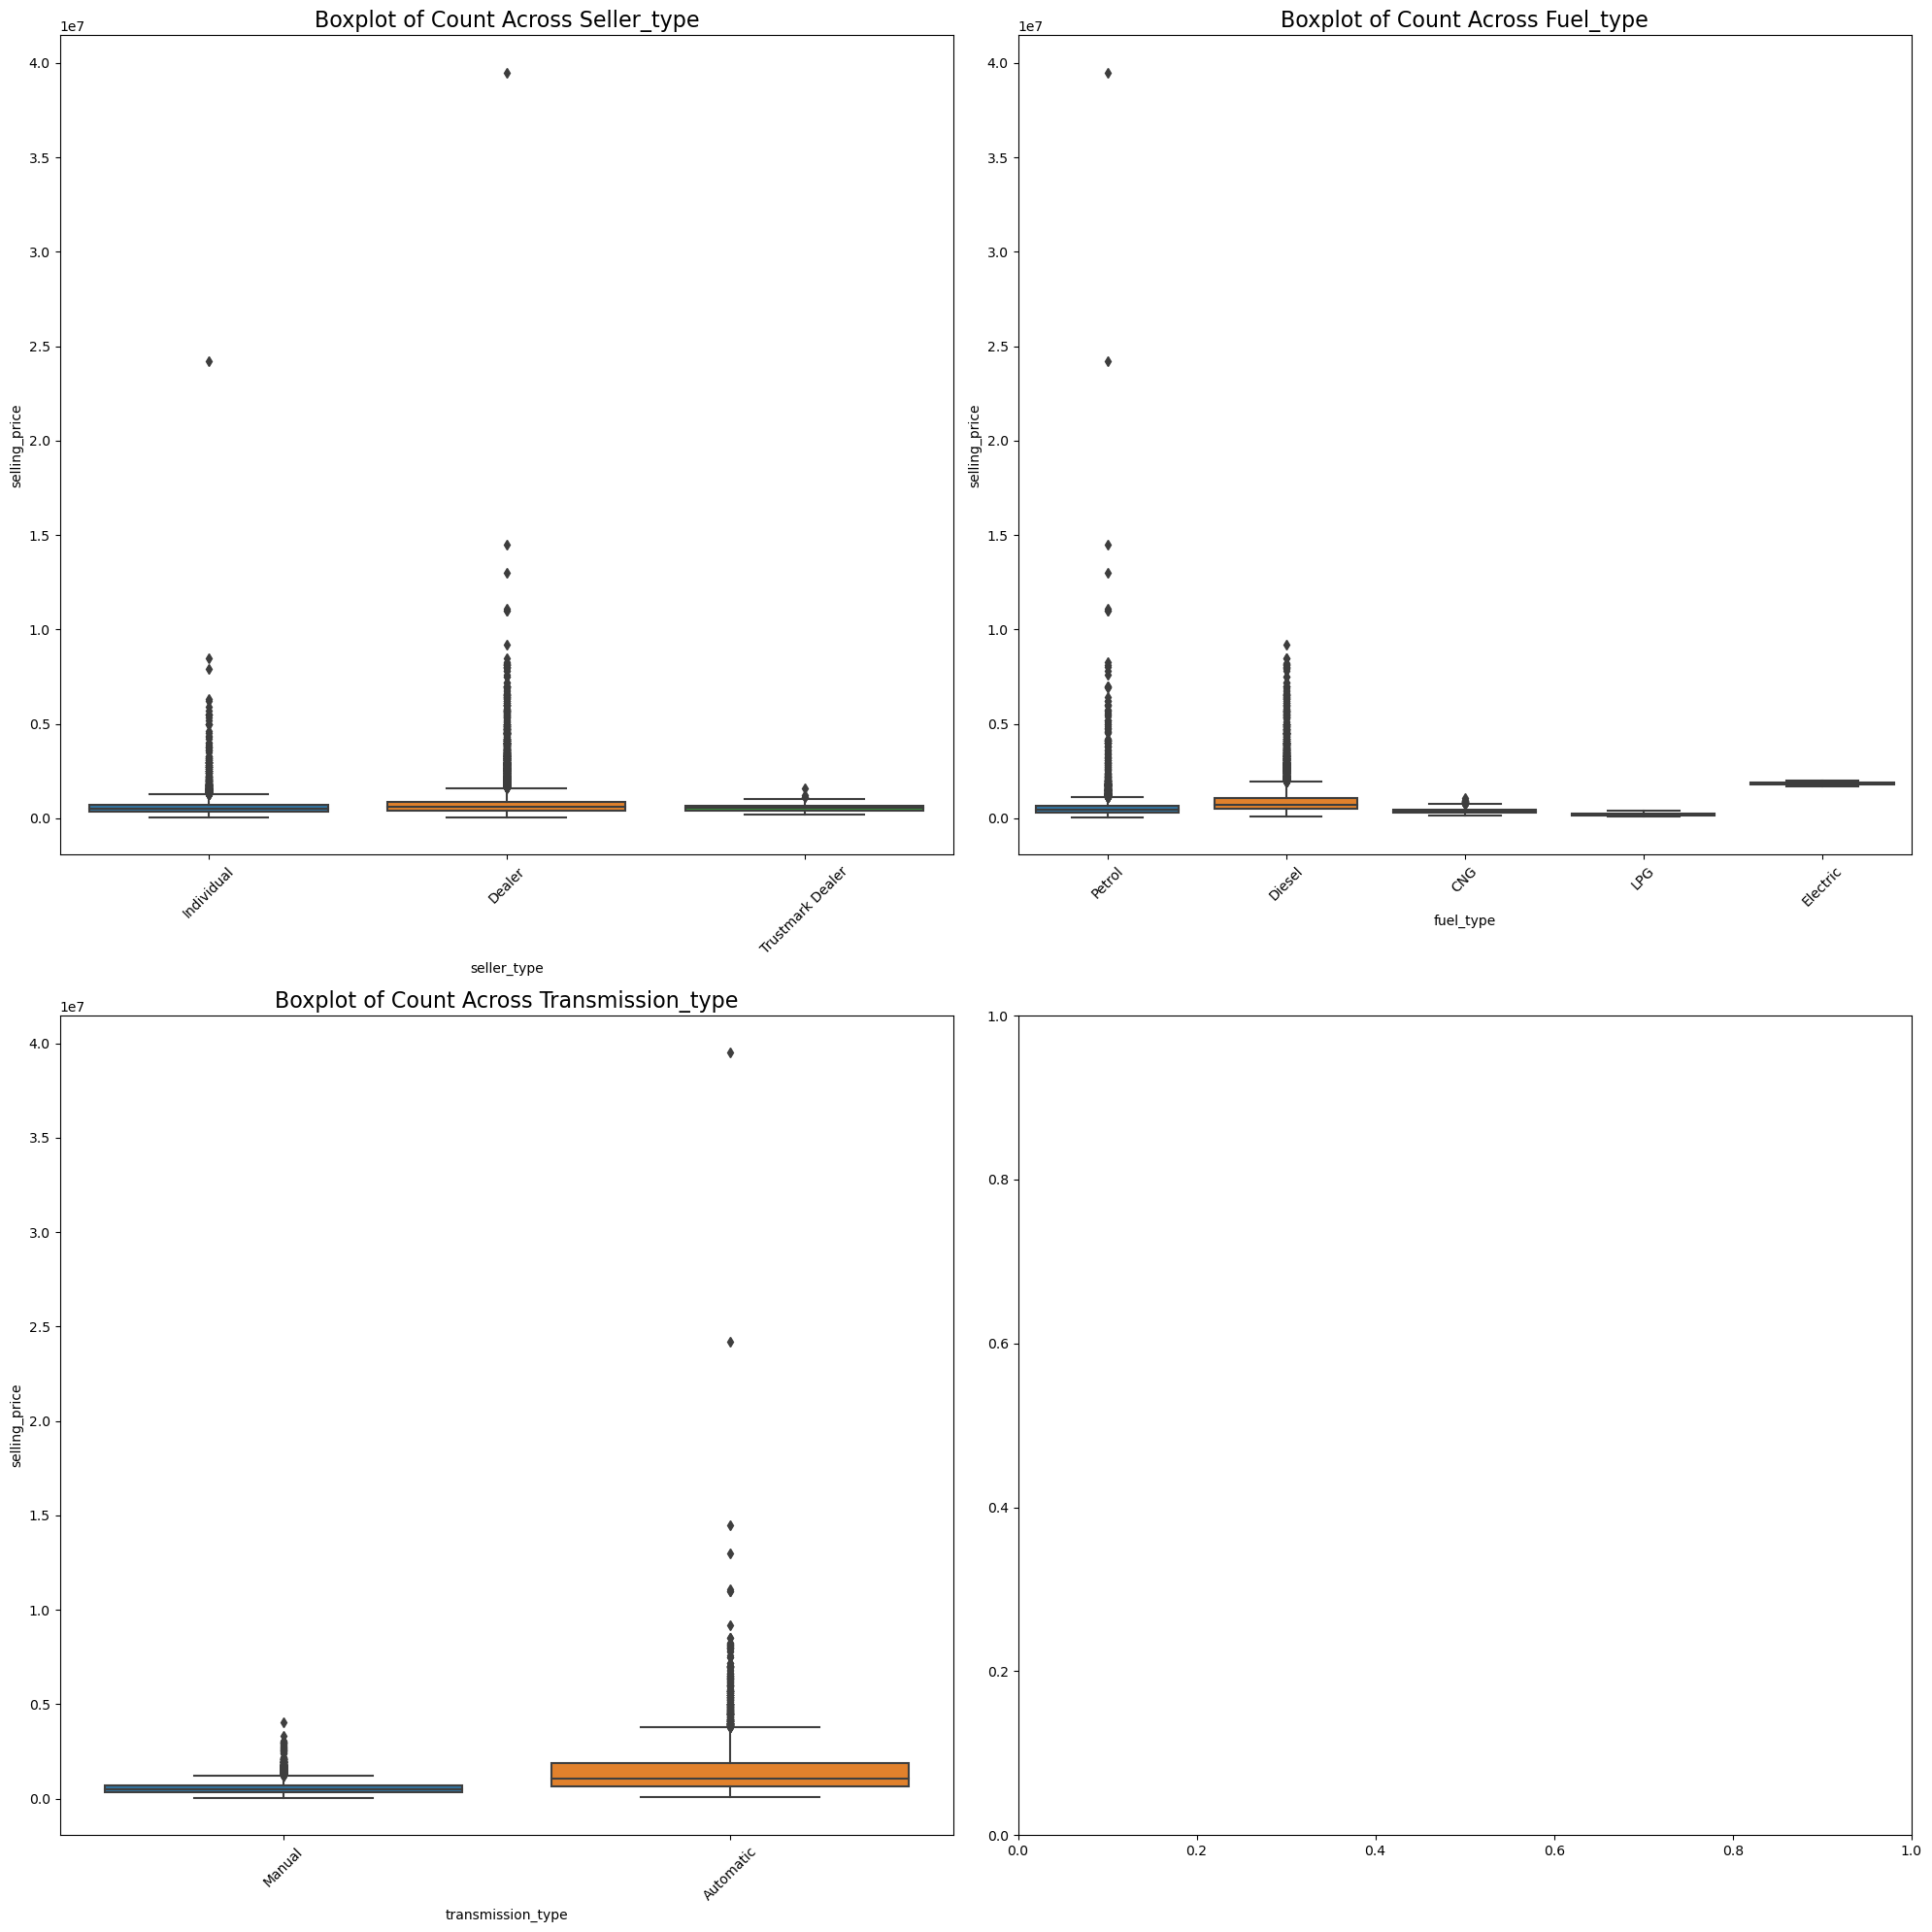

In [12]:
cat_vars = ['seller_type','fuel_type','transmission_type']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    ax = axes[i]
    sns.boxplot(x=var, y='selling_price', data=df, ax=axes[i])
    ax.set_title(f'Boxplot of Count Across {var.capitalize()}', fontsize=16)
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

In [13]:
features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Calculate the first quartile (Q1) and third quartile (Q3) for each numerical column
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)

# Calculate the interquartile range (IQR) for each numerical column
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers for each numerical column
outliers = (df[features] < lower_bound) | (df[features] > upper_bound)


In [14]:
# Select relevant features for Winsorization
features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
from scipy.stats.mstats import winsorize
# Perform Winsorization for each feature
for feature in features:
    quantiles = df[feature].quantile([0.05, 0.95]).values
    lower_bound, upper_bound = quantiles
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

print(df)

       vehicle_age  km_driven seller_type fuel_type transmission_type  \
0                9     120000  Individual    Petrol            Manual   
1                5      20000  Individual    Petrol            Manual   
2               11      60000  Individual    Petrol            Manual   
3                9      37000  Individual    Petrol            Manual   
4                6      30000      Dealer    Diesel            Manual   
...            ...        ...         ...       ...               ...   
15406            9      10723      Dealer    Petrol            Manual   
15407            2      18000      Dealer    Petrol            Manual   
15408            6      67000      Dealer    Diesel            Manual   
15409            5     120000      Dealer    Diesel            Manual   
15410            2      13000      Dealer    Petrol         Automatic   

       mileage  engine  max_power  seats  selling_price  
0        19.70     998      58.16      5         215000  
1      

<Axes: >

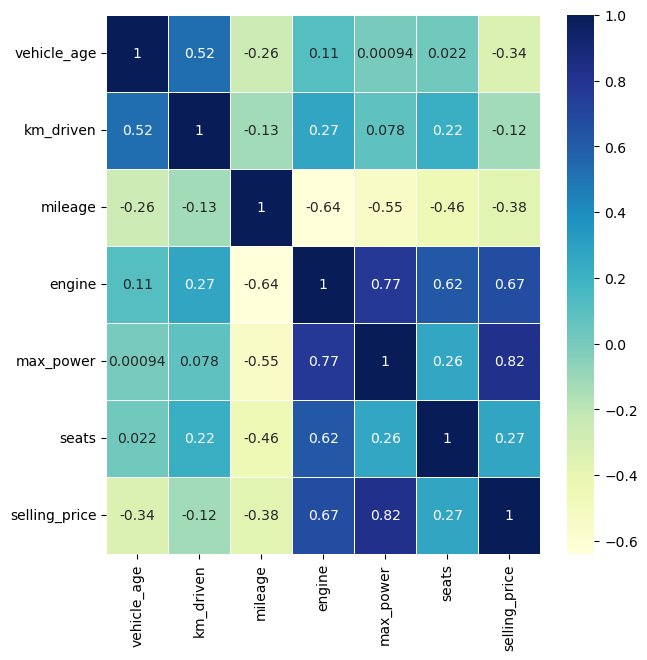

In [15]:
###### Visualize multicollinearity 
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidth=0.5)



In [16]:
df.columns

Index(['vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [17]:
import pandas as pd

# Perform one-hot encoding for categorical variables
df_encode = pd.get_dummies(df, columns=['seller_type', 'fuel_type', 'transmission_type'], drop_first=True)

# Create an instance of LabelEncoder
#label_encoder = LabelEncoder()

# Encode the 'brand' column using LabelEncoder
#df_encode['brand'] = label_encoder.fit_transform(df_encode['brand'])

# Display the DataFrame with the encoded columns
print(df_encode)
df_encode.info()


       vehicle_age  km_driven  mileage  engine  max_power  seats  \
0                9     120000    19.70     998      58.16      5   
1                5      20000    18.90    1197      82.00      5   
2               11      60000    17.00    1197      80.00      5   
3                9      37000    20.92     998      67.10      5   
4                6      30000    22.77    1498      98.59      5   
...            ...        ...      ...     ...        ...    ...   
15406            9      10723    19.81    1086      68.05      5   
15407            2      18000    17.50    1373      91.10      7   
15408            6      67000    21.14    1498     103.52      5   
15409            5     120000    16.00    2179     140.00      7   
15410            2      13000    18.00    1497     117.60      5   

       selling_price  seller_type_Individual  seller_type_Trustmark Dealer  \
0             215000                       1                             0   
1             550000       

In [18]:
#Data Preprocessing 
#Standardization using MinMax Scale

from sklearn.preprocessing import MinMaxScaler

Scalertransform=MinMaxScaler()
num_vars=['vehicle_age','km_driven','mileage', 'engine', 'max_power', 'seats']
df_encode[num_vars]=Scalertransform.fit_transform(df_encode[num_vars])
df_encode.head(5)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,0.7,1.000000,0.500363,0.000000,0.000000,0.0,215000,1,0,0,0,0,1,1
1,0.3,0.090909,0.442350,0.130492,0.189447,0.0,550000,1,0,0,0,0,1,1
2,0.9,0.454545,0.304569,0.130492,0.173554,0.0,215000,1,0,0,0,0,1,1
3,0.7,0.245455,0.588832,0.000000,0.071043,0.0,226000,1,0,0,0,0,1,1
4,0.4,0.181818,0.722988,0.327869,0.321281,0.0,570000,0,0,1,0,0,0,1


In [19]:
#Seperate variables wher X is Independent variable and y is target variable

X=df_encode.drop(['selling_price'],axis=1)
y=df_encode['selling_price']

In [20]:
from statsmodels.regression.linear_model import OLS
model_fs=OLS(endog=y,exog=X)
result=model_fs.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                          1.768e+04
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:21:22   Log-Likelihood:                     -2.1071e+05
No. Observations:               15411   AIC:                                  4.215e+05
Df Residuals:                   15398   BIC:                                  4.215e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [21]:
# Select significant features based on p-values (e.g., p < 0.05)
significant_feature=result.pvalues[result.pvalues<0.05].index.tolist()
X=X[significant_feature]
X.columns

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'seller_type_Individual', 'fuel_type_Diesel', 'fuel_type_Electric',
       'fuel_type_LPG', 'fuel_type_Petrol', 'transmission_type_Manual'],
      dtype='object')

In [22]:
#Splitting the data into train and test data set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10787, 12)
(4624, 12)
(10787,)
(4624,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel


In [24]:
#Model training

models={"Linear Regression":LinearRegression(),
       "Decission Tree":DecisionTreeRegressor(),
       "Random Forest":RandomForestRegressor(),
       "AdaBoost Regressor":AdaBoostRegressor(),
       "XGB Regressor":XGBRegressor(),
       "KNN":KNeighborsRegressor()}

In [25]:
#Define hyperparameters grid for each model
param_grid = {
    "Linear Regression": {},
    "Decission Tree": {"max_depth": [4,8,10], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [100, 200, 300], "max_depth": [4,8,10], "min_samples_split": [2, 5, 10]},
    "AdaBoost Regressor": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.05, 0.1]},
    "XGB Regressor": {"n_estimators": [50, 100, 200], "max_depth": [4,8,10], "learning_rate": [0.01, 0.05, 0.1]},
    "KNN": {"n_neighbors": [2,3, 5, 7, 10]}
}

In [26]:
# Perform grid search with cross-validation for each model
best_params = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=10, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_

# Print best parameters for each model
for model_name, params in best_params.items():
    print(f'--------------- Best Params for {model_name} -------------------')
    print(params)

--------------- Best Params for Linear Regression -------------------
{}
--------------- Best Params for Decission Tree -------------------
{'max_depth': 10, 'min_samples_split': 10}
--------------- Best Params for Random Forest -------------------
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
--------------- Best Params for AdaBoost Regressor -------------------
{'learning_rate': 0.1, 'n_estimators': 50}
--------------- Best Params for XGB Regressor -------------------
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
--------------- Best Params for KNN -------------------
{'n_neighbors': 5}


In [27]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r_square=r2_score(y_test,y_pred)
    return mae,mse,rmse,r_square

for model_name, model in models.items():
    mae, mse, rmse, r_square = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"Model: {model_name}")
    print(f"MAE:{mae:.4f}")
    print(f"MSE:{mse:.4f}")
    print(f"RMSE:{rmse:.4f}")
    print(f"R_2:{r_square:.4f}")
    print("-"*20)
          


    


Model: Linear Regression
MAE:149016.9974
MSE:39196892848.5519
RMSE:197982.0518
R_2:0.8279
--------------------
Model: Decission Tree
MAE:92650.1586
MSE:23536304247.3435
RMSE:153415.4629
R_2:0.8967
--------------------
Model: Random Forest
MAE:75506.8815
MSE:14599133895.0232
RMSE:120826.8757
R_2:0.9359
--------------------
Model: AdaBoost Regressor
MAE:173634.2450
MSE:46105871161.0314
RMSE:214722.7775
R_2:0.7976
--------------------
Model: XGB Regressor
MAE:73131.8329
MSE:13160005669.2666
RMSE:114717.0679
R_2:0.9422
--------------------
Model: KNN
MAE:86788.0190
MSE:17859048953.2872
RMSE:133637.7527
R_2:0.9216
--------------------


In [28]:
 #Choosing XGB Regressor

from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=8,n_estimators=200,learning_rate=0.05)
print(RegModel)

RF=RegModel.fit(X_train,y_train)
y_pred=RF.predict(X_test)
y_pred=np.round(y_pred).astype(int)
error_values=y_test-y_pred
prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error':error_values})
print(prediction_df.head())

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value for train_model:',metrics.r2_score(y_train, RegModel.predict(X_train)))

# Measuring Goodness of fit in testing data
print('R2 value for the test_model:',metrics.r2_score(y_test,y_pred))

#Measuring the Cost functions
print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',metrics.mean_squared_error(y_test,y_pred))
print('R2 value:',metrics.r2_score(y_test,y_pred))

cv_scores = cross_val_score(RegModel, X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores=-cv_scores
print("Cross-Validation Scores:",cv_scores)
print("Cross-validated MSE:",cv_scores.mean())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
        Actual  Predicted   Error
3334    215000     248101  -33101
10928   600000     614978  -14978
2518    665000     605145   59855
11322  1570000    1263472  306528
9394    215000     224304   -9304
R2 Value for train_model: 0.978666843995306
R2 value for t

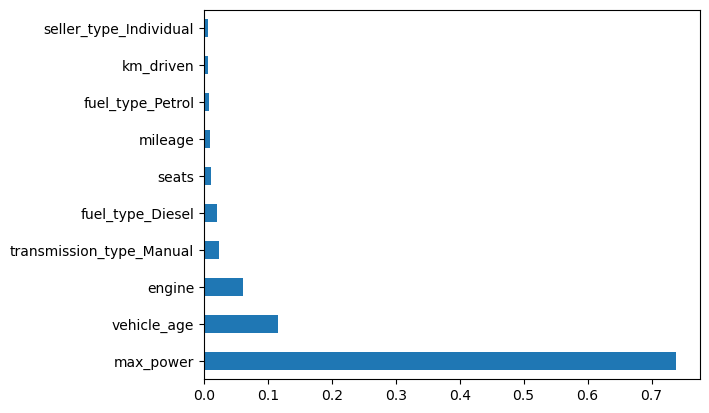

In [32]:
Predictors=['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'seller_type_Individual', 'fuel_type_Diesel', 'fuel_type_Electric',
       'fuel_type_LPG', 'fuel_type_Petrol', 'transmission_type_Manual']

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(RF.feature_importances_,index=Predictors)
top_features=feature_importances.nlargest(10).plot(kind='barh')


In [33]:
X.columns

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'seller_type_Individual', 'fuel_type_Diesel', 'fuel_type_Electric',
       'fuel_type_LPG', 'fuel_type_Petrol', 'transmission_type_Manual'],
      dtype='object')

In [34]:
top_features = feature_importances.nlargest(10)
top_features = list(top_features.index)

X_new=X[top_features]

# Split the new dataset into training and testing sets
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Create a new instance of the XGBRegressor model
model_new = XGBRegressor(max_depth=8, n_estimators=200, learning_rate=0.05)

# Fit the new model using the training data with only the top 10 features
model_new.fit(X_train_new, y_train)

# Make predictions on the test set using the new model
y_pred_new = model_new.predict(X_test_new)

# Evaluate the performance of the new model
print('R2 value for the new model:', metrics.r2_score(y_test, y_pred_new))
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred_new))
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred_new))

# Perform cross-validation on the new model
cv_scores = cross_val_score(model_new, X_new, y, cv=10, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
print("Cross-Validation Scores:", cv_scores)
print("Cross-validated MSE:", cv_scores.mean())


R2 value for the new model: 0.9441827486428147
Mean absolute error: 71297.96169518326
Mean squared error: 12694656093.787567
Cross-Validation Scores: [1.11158929e+10 1.03528073e+10 1.19409362e+10 1.25308943e+10
 1.28132990e+10 1.22514179e+10 1.25729380e+10 1.21925008e+10
 1.42151194e+10 1.44088384e+10]
Cross-validated MSE: 12439464412.109943


In [37]:
def predict_selling_price(vehicle_age, km_driven,engine, mileage,max_power, seats, seller_type_Individual, fuel_type_Diesel, fuel_type_Electric, fuel_type_LPG, fuel_type_Petrol, transmission_type_Manual):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame([[vehicle_age, km_driven, mileage, engine, max_power, seats, seller_type_Individual, fuel_type_Diesel, fuel_type_Electric, fuel_type_LPG, fuel_type_Petrol, transmission_type_Manual]], columns=Predictors)
    
    # Make the prediction
    selling_price = RegModel.predict(input_data)
    
    return selling_price[0]


In [38]:
selling_price = predict_selling_price(vehicle_age=5, km_driven=50000, mileage=20, engine=1000, max_power=60, seats=5, seller_type_Individual=1, fuel_type_Diesel=0, fuel_type_Electric=0, fuel_type_LPG=0, fuel_type_Petrol=1, transmission_type_Manual=1)
print("Predicted selling price:", selling_price)


Predicted selling price: 1498045.0


In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())